In [1]:
import xarray as xr
import numpy as np
from geomedian import geometric_median, spectral_angle,medoid #import the geomedian module
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
# example of calculating the geometric median from netcdf inputs 
file = '/g/data/xc0/project/Burn_Mapping/01_LS_Reflectance_and_Indices/Tas2016_Central_Plateau_NBAR_and_Indices_reduced.nc'
data = xr.open_dataset(file)


In [12]:
MaxInter = 60
tol      = 1.e-7
Nbands = 6
GeoMed= np.empty((Nbands,len(data.y),len(data.x)))
Medoid= np.empty((Nbands,len(data.y),len(data.x)))
SA = np.empty((len(data.y),len(data.x)))
t = 23
for x in range(0,len(data.x)):
    for y in range(0,len(data.y)):
        X = np.empty((Nbands,len(data.time))) #construct pxN matrix for the GM calculation 
        X[0,:] = data.blue[:,y,x]
        X[1,:] = data.green[:,y,x]
        X[2,:] = data.red[:,y,x]
        X[3,:] = data.nir[:,y,x]
        X[4,:] = data.swir1[:,y,x]
        X[5,:] = data.swir2[:,y,x]
        GeoMed[:,y,x] = geometric_median(X,tol,MaxInter) #calculate geomatric median
        Medoid[:,y,x] = medoid(X) #calculate medoid
        obs=X[:,t]
        SA[y,x]=spectral_angle(GeoMed[:,y,x],obs) #sepctral angle at time t reference to geometric median

In [13]:
def stretch_RGB(data,minimum,maximum):
    img = np.empty(data.shape)
    row,col = np.where(~np.isnan(data))
    tmp = data[row,col]
    #a = (tmp-np.percentile(tmp,3))/(np.percentile(tmp,97)-np.percentile(tmp,3))*255
    a = (tmp-minimum)/(maximum-minimum)*255
    a[a<0]=0
    a[a>255]=255
    img[row,col] = a
    return img


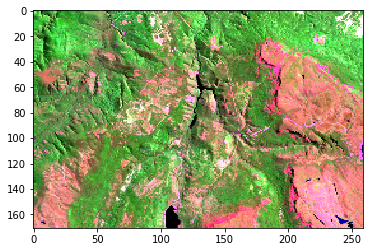

In [18]:
from PIL import Image,ImageEnhance
#plot the geometric median with swir2,nir and green band as R,G,B
rgbArray = np.zeros((GeoMed.shape[1],GeoMed.shape[2],3), 'uint8')
rgbArray[..., 0] = (stretch_RGB(GeoMed[5,:,:],100,900))
rgbArray[..., 1] = (stretch_RGB(GeoMed[3,:,:],150,3000))
rgbArray[..., 2] = (stretch_RGB(GeoMed[1,:,:],100,600))
img = Image.fromarray(rgbArray)
plt.imshow(img)

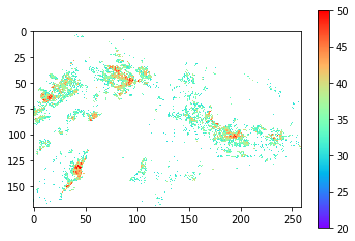

In [17]:
#plot spectral angle

SA[SA<30]=np.nan
plt.imshow(SA,cmap='rainbow',vmin=20,vmax=50)
plt.colorbar()